# SPINN NF2 Visualization
> NF2 + SPINN

In [ ]:
import pickle

with open("bv.pickle","rb") as f:
    bv = pickle.load(f)

with open("b_bottom.pickle","rb") as f:
    b_bottom = pickle.load(f)

with open("x.pickle","rb") as f:
    x = pickle.load(f)

with open("y.pickle","rb") as f:
    y = pickle.load(f)

with open("z.pickle","rb") as f:
    z = pickle.load(f)

with open("B.pickle","rb") as f:
    B = pickle.load(f)

with open("J.pickle","rb") as f:
    J = pickle.load(f)

In [ ]:
B.shape, J.shape

((256, 256, 256, 3), (256, 256, 256, 3))

In [ ]:
import numpy as np

In [ ]:
Jnorm = np.linalg.norm(J, axis=-1)
Jnorm.shape

(256, 256, 256)

In [ ]:
JxB = np.cross(J, B, axis=-1) 
JxB.shape

(256, 256, 256, 3)

In [ ]:
np.sum(JxB**2, axis=-1).shape

(256, 256, 256)

In [ ]:
np.mean(np.sum(JxB**2, axis=-1))

1.3189108

In [ ]:
import matplotlib.pyplot as plt

<matplotlib.image.AxesImage>

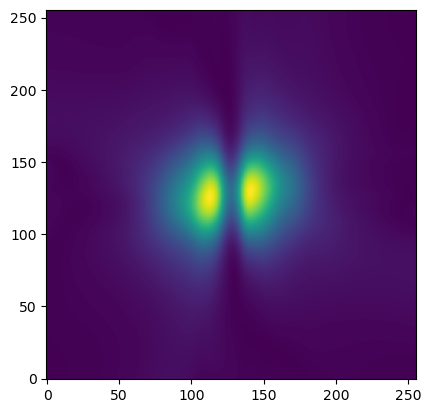

In [ ]:
plt.imshow(Jnorm[:, :, 0].transpose(), origin='lower')

In [ ]:
Bx = B[..., 0]
By = B[..., 1]
Bz = B[..., 2]

<matplotlib.image.AxesImage>

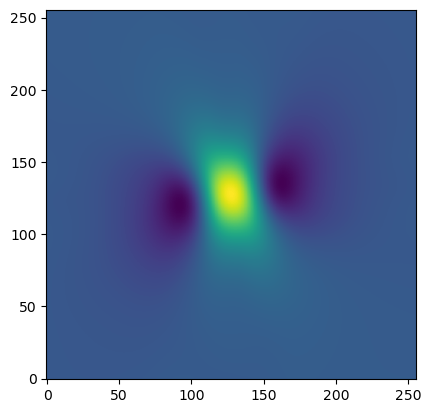

In [ ]:
plt.imshow(Bz[:, :, 0].transpose(), origin='lower')

<matplotlib.image.AxesImage>

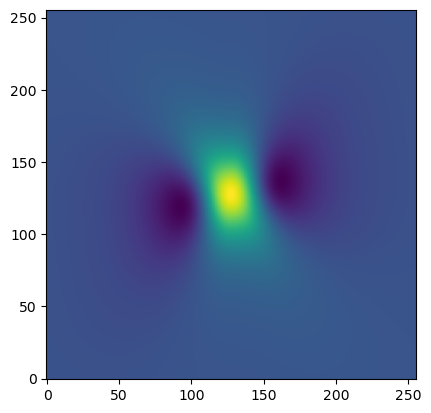

In [ ]:
plt.imshow(b_bottom[:, :, 2].transpose(), origin='lower')

In [ ]:
np.linalg.norm(B, axis=-1).shape

(256, 256, 256)

In [ ]:
np.sum(B**2, axis=-1).shape

(256, 256, 256)

<matplotlib.image.AxesImage>

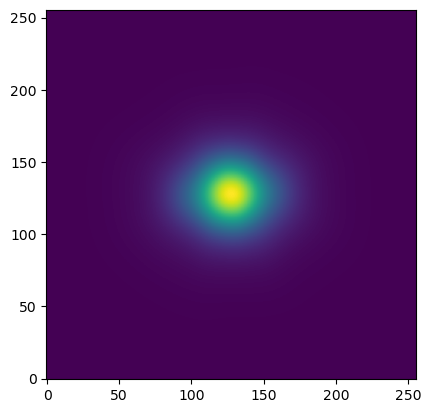

In [ ]:
plt.imshow(np.sum(B**2, axis=-1)[:, :, 0].transpose(), origin='lower')
#plt.imshow(Bx[:, :, 0]**2+By[:, :, 0]**2+Bz[:, :, 0]**2)

<matplotlib.image.AxesImage>

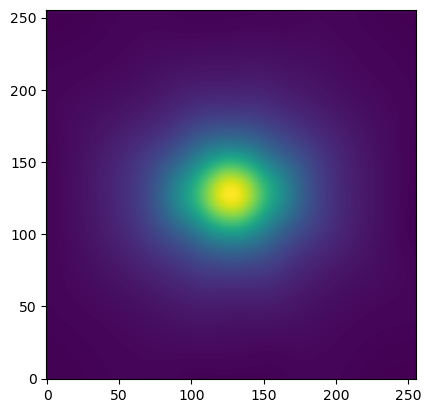

In [ ]:
plt.imshow(np.linalg.norm(B, axis=-1)[:, :, 0].transpose(), origin='lower')

In [ ]:
import pyvista as pv

In [ ]:
pv.set_jupyter_backend('static')

In [ ]:
xv, yv, zv = np.meshgrid(np.squeeze(x), np.squeeze(y), np.squeeze(z), indexing='ij')

In [ ]:
points = np.vstack((xv.ravel(), yv.ravel(), zv.ravel())).T
vectors = np.vstack((Bx.ravel(), By.ravel(), Bz.ravel())).T
pdata = pv.vector_poly_data(points, vectors)

In [ ]:
xmin, xmax, ymin, ymax, zmin, zmax = pdata.bounds
xsize, ysize, zsize = xmax-xmin, ymax-ymin, zmax-zmin
xcenter, ycenter, zcenter = (xmin+xmax)/2, (ymin+ymax)/2, (zmin+zmax)/2

In [ ]:
grid = pv.StructuredGrid(xv, yv, zv)
grid['B'] = np.stack([Bx, By, Bz], axis=-1).transpose(2, 1, 0, 3).reshape(-1, 3)
grid.active_vectors_name = 'B'
magnitude = np.linalg.norm(vectors, axis=-1)
grid['mag'] = magnitude
grid.active_scalars_name = 'mag'

In [ ]:
grid

StructuredGrid (0x7f9cc9c82860)
  N Cells:      16581375
  N Points:     16777216
  X Bounds:     0.000e+00, 2.000e+00
  Y Bounds:     0.000e+00, 2.000e+00
  Z Bounds:     0.000e+00, 2.000e+00
  Dimensions:   256, 256, 256
  N Arrays:     2

In [ ]:
import json
with open('config.json') as config:
    info = json.load(config)

nx = info['nx']
ny = info['ny']
nz = info['nz']
b_norm = info['b_norm']

In [ ]:
bottom_subset = (0, nx-1, 0, ny-1, 0, 0)
bottom = grid.extract_subset(bottom_subset).extract_surface()
bottom

PolyData (0x7f9cc9d48ee0)
  N Cells:    65025
  N Points:   65536
  N Strips:   0
  X Bounds:   0.000e+00, 2.000e+00
  Y Bounds:   0.000e+00, 2.000e+00
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   4

In [ ]:
x_bottom = bottom.points[:, 0].reshape(nx, ny)
y_bottom = bottom.points[:, 1].reshape(nx, ny)
B_bottom = bottom['B'].reshape(nx, ny, 3)

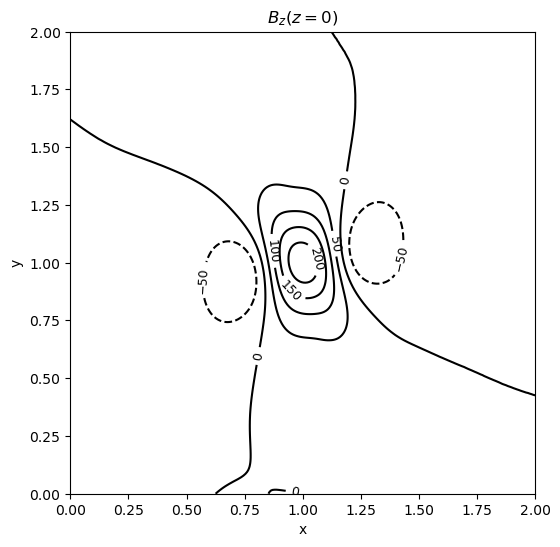

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.contour(x_bottom, y_bottom, B_bottom[:, :, 2], 
                    origin='lower', colors='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.clabel(CS, fontsize=9, inline=True)
ax.set_title(r"$B_z(z=0)$")
plt.show()

In [ ]:
from zpinn.pinn_nf2_cleanup import create_coordinates

In [ ]:
co_bounds = (0, nx-1, 0, ny-1, 0, nz-1)
co_coords = create_coordinates(co_bounds).reshape(-1, 3)
co_coord = co_coords.reshape(nx, ny, nz, 3)
x = co_coord[..., 0]
y = co_coord[..., 1]
z = co_coord[..., 2]
ggrid = pv.StructuredGrid(x, y, z)
ggrid['B'] = grid['B']
ggrid.active_vectors_name = 'B'
magnitude = np.linalg.norm(grid['B'], axis=-1)
ggrid['mag'] = magnitude
ggrid.active_scalars_name = 'mag'

In [ ]:
ggrid

StructuredGrid (0x7f9d146dbc40)
  N Cells:      16581375
  N Points:     16777216
  X Bounds:     0.000e+00, 2.550e+02
  Y Bounds:     0.000e+00, 2.550e+02
  Z Bounds:     0.000e+00, 2.550e+02
  Dimensions:   256, 256, 256
  N Arrays:     2

In [ ]:
bottom_subset = (0, nx-1, 0, ny-1, 0, 0)
bottom = ggrid.extract_subset(bottom_subset).extract_surface()
bottom

PolyData (0x7f9c24602da0)
  N Cells:    65025
  N Points:   65536
  N Strips:   0
  X Bounds:   0.000e+00, 2.550e+02
  Y Bounds:   0.000e+00, 2.550e+02
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   4

In [ ]:
x_bottom = bottom.points[:, 0].reshape(nx, ny)
y_bottom = bottom.points[:, 1].reshape(nx, ny)
B_bottom = bottom['B'].reshape(nx, ny, 3)

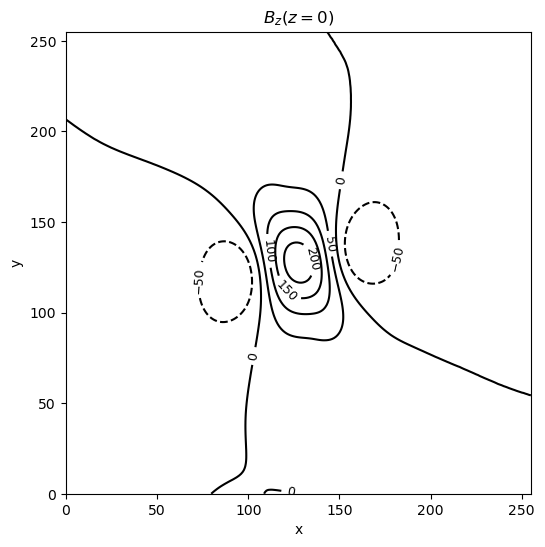

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.contour(x_bottom, y_bottom, B_bottom[:, :, 2], 
                    origin='lower', colors='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.clabel(CS, fontsize=9, inline=True)
ax.set_title(r"$B_z(z=0)$")
plt.show()

In [ ]:
from zpinn.pinn_nf2_visualization import draw_grid

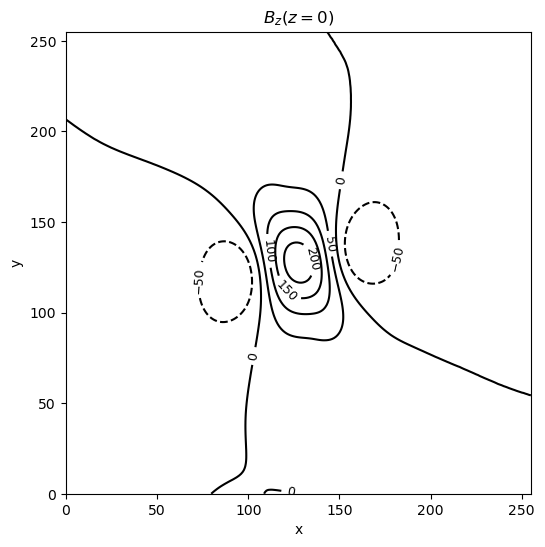

In [ ]:
aaa = draw_grid(ggrid)
aaa.plt_Bz()

In [ ]:
co_bounds = (0, nx-1, 0, ny-1, 0, nz-1)
co_coords = create_coordinates(co_bounds).reshape(-1, 3)
co_coord = co_coords.reshape(nx, ny, nz, 3)
x = co_coord[..., 0]
y = co_coord[..., 1]
z = co_coord[..., 2]
bgrid = pv.StructuredGrid(x, y, z)
# bgrid['B'] = b.grid['B']
bgrid['B'] = bv
bgrid.active_vectors_name = 'B'
# magnitude = np.linalg.norm(b.grid['B'], axis=-1)
magnitude = np.linalg.norm(bv, axis=-1)
bgrid['mag'] = magnitude
bgrid.active_scalars_name = 'mag'

In [ ]:
bgrid

StructuredGrid (0x7f9d142e1780)
  N Cells:      16581375
  N Points:     16777216
  X Bounds:     0.000e+00, 2.550e+02
  Y Bounds:     0.000e+00, 2.550e+02
  Z Bounds:     0.000e+00, 2.550e+02
  Dimensions:   256, 256, 256
  N Arrays:     2

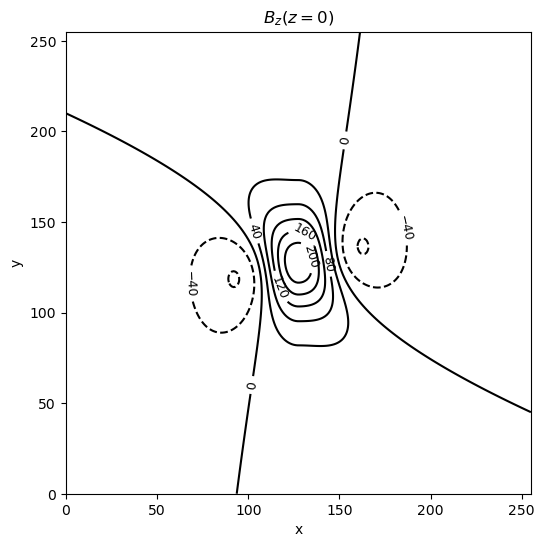

In [ ]:
bbb = draw_grid(bgrid)
bbb.plt_Bz()

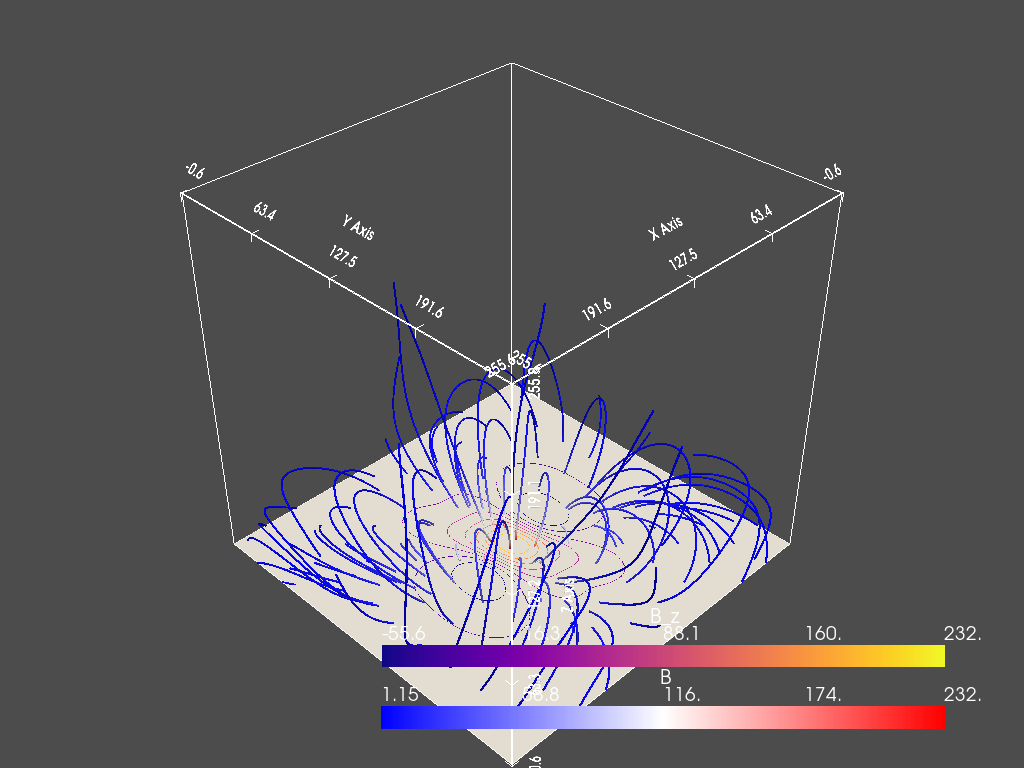

In [ ]:
aaa.pv_streamline()

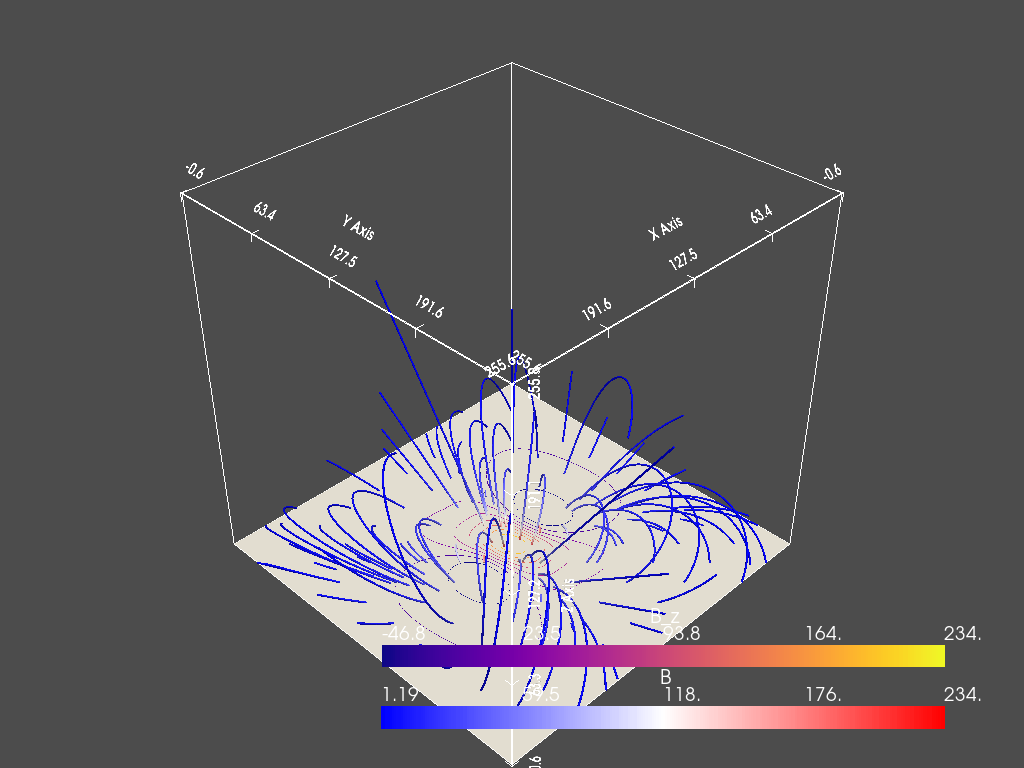

In [ ]:
bbb.pv_streamline()